In [234]:
#pip install pandas numpy scikit-learn matplotlib seaborn

Import Library

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Load Dataset

In [165]:
# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


Analyze Dataset

In [33]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [37]:
#df.isnull().sum()  No null values
df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
Target         3842
dtype: int64

In [39]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Mean Squared Error: 0.4250
R-squared Score: 0.5526
Cross-Validation R² Scores: [0.52316131 0.33308636 0.51274177 0.51189042 0.6290157 ]
Mean R² Score: 0.5019791081137766
Standard Deviation of R² Scores: 0.09521114536903517


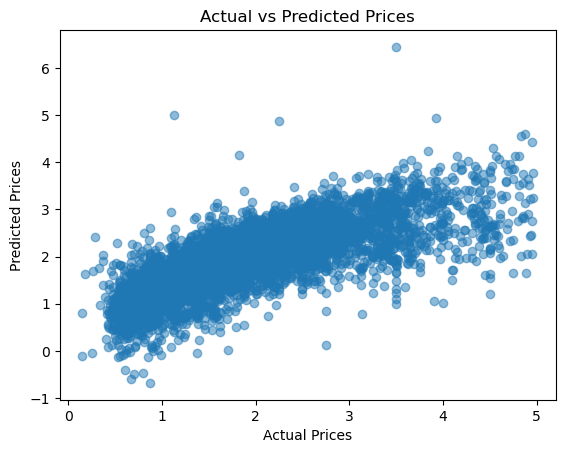

In [230]:
#Dataset already normalized
#Remove Target price less than 5, since there are not high price in the model, so the model will be trained to handle price < 5
df = df[df['Target'] < 5]

# New feature
df["RoomsPerPerson"] = df["AveRooms"] / df["Population"] 

# Select features and target
X = df[['MedInc', 'Latitude', 'Longitude', 'HouseAge', 'RoomsPerPerson']]  # features
y = df['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")

scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 'r2' for R-squared, can use 'neg_mean_squared_error'

print("Cross-Validation R² Scores:", scores)
print("Mean R² Score:", np.mean(scores))
print("Standard Deviation of R² Scores:", np.std(scores))

# Plot results
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


Applying Polynomial Features

Polynomial Regression (degree=3) Results:
Mean Squared Error: 0.3999
R-squared Score: 0.5790


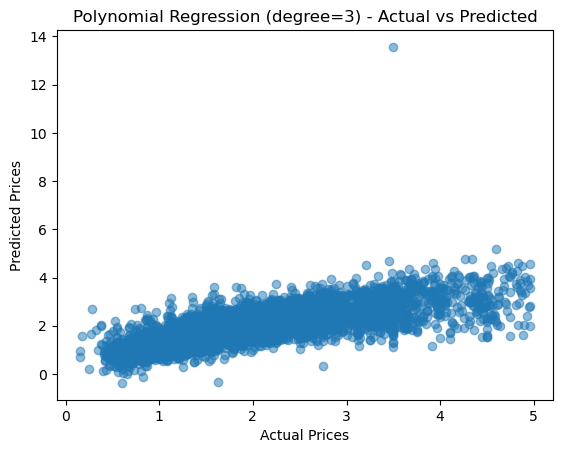

In [226]:

# Define polynomial degree (start with 2, you can try higher)
degree = 3

# Create a pipeline that transforms the data and applies Linear Regression
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train model
model_poly.fit(X_train, y_train)

# Make predictions
y_pred_poly = model_poly.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree={degree}) Results:")
print(f"Mean Squared Error: {mse_poly:.4f}")
print(f"R-squared Score: {r2_poly:.4f}")

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Polynomial Regression (degree={degree}) - Actual vs Predicted")
plt.show()


Make your Prediction

In [181]:
custom_input = np.array([[3.5, 34.0, -118.2, 20, 5.0]])  # Adjust values as needed

# Make sure the input matches the feature order in X
prediction = model.predict(custom_input)

print(f"Predicted House Price: {prediction[0]:.2f}")

Predicted House Price: 4.49


C:\Users\Me\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [232]:
# Get user input for features using Polynomial Features
med_inc = float(input("Enter Median Income: "))
latitude = float(input("Enter Latitude: "))
longitude = float(input("Enter Longitude: "))
house_age = float(input("Enter House Age: "))
ave_rooms = float(input("Enter Average Number of Rooms: "))

# Create input array
custom_input = np.array([[med_inc, latitude, longitude, house_age, ave_rooms]])

# Predict house price
prediction = model_poly.predict(custom_input)
print(f"Predicted House Price: {prediction[0]:.2f}")

Enter Median Income:  3
Enter Latitude:  4
Enter Longitude:  2
Enter House Age:  1
Enter Average Number of Rooms:  3


Predicted House Price: 75.32


C:\Users\Me\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
